### 1. 행렬의 미분

함수가 행렬의 원소가 될 수 있다는 관점에서 출발

$$ f(x) = \begin{bmatrix} x^2 & 2x \\ \log x & e^{x^2} \end{bmatrix} $$

여러 개의 입력을 가지는 다변수 함수 $ f(x_1, x_2) $를 독립변수가 벡터(열벡터)$\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$인 경우로 생각

$$ f(x_1, x_2) = f\left( \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \right) = f(x) $$

- 위와 같은 행렬을 입력이나 출력으로 가지는 함수를 미분하는 것을 행렬미분이라 함
- 행렬 미분은 정확히 편미분(partial derivative)
- 행렬 미분에는 분자 중심 표현법(Numerator-layout notation)과 분모 중심 표현법(Denominator-layout notation) 두 가지가 있음
- 데이터 분석에는 주로 분모 중심 표현법이 사용

스칼라와 벡터/행렬의 구분을 돕기 위해 벡터/행렬은 $\mathbf{x}$, $\mathbf{A}$처럼 볼드체로 표기

### 2. 벡터로 스칼라를 미분 (gradiant vector, $\nabla y$)

#### 2-1. gradiant vector 개념

- 벡터는 독립변수 x, 스칼라는 종속변수 y를 의미
- 편미분 값은 $\frac{\partial y}{\partial x_1}, \frac{\partial y}{\partial x_2}, \cdots$ 등으로 여러 개가 존재
- 벡터로 스칼라를 미분하는 경우엔 결과를 열 벡터로 표시 (gradiant vector)

$$
\nabla y = 
\frac{\partial y}{\partial \mathbf{x}} =
\begin{bmatrix}
\dfrac{\partial y}{\partial x_1}\\
\dfrac{\partial y}{\partial x_2}\\
\vdots\\
\dfrac{\partial y}{\partial x_N}\\
\end{bmatrix}
$$

그레디언트 벡터 구하기

$$ f(x, y) = 2x^2 + 6xy + 7y^2 - 26x - 54y + 107 $$

정답 (y라는 결과 값에 $x1$, $x2$등 각각의 x값으로 미분

$$
\nabla f = 
\begin{bmatrix}
\dfrac{\partial f}{\partial x}\\
\dfrac{\partial f}{\partial y}\\
\end{bmatrix} =
\begin{bmatrix}
4x + 6y - 26\\
6x + 14y - 54\\
\end{bmatrix}
$$

#### 2-2. gradiant vector 그림

1) 컨투어 플롯 (contour plot)

- 2개의 독립 변수를 가지는 함수는 2차원 상에서 컨투어(contour)플롯으로 나타남
- 이 때, 각 위치에서 그레디언트 벡터를 화살표로 표현

2) 퀴버 플롯 (quiver plot)

- 컨투어 플롯 위에 그레디언트 벡터를 화살표로 나타낸 플롯을 의미
- 그레디언트 벡터 방향은 단위길이당 함수 값(높이)이 가장 크게 증가하는 방향 
- 그레디언트 벡터의 방향은 등고선(isoline)의 방향과 직교
- 그레디언트 벡터의 크기는 기울기를 의미

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

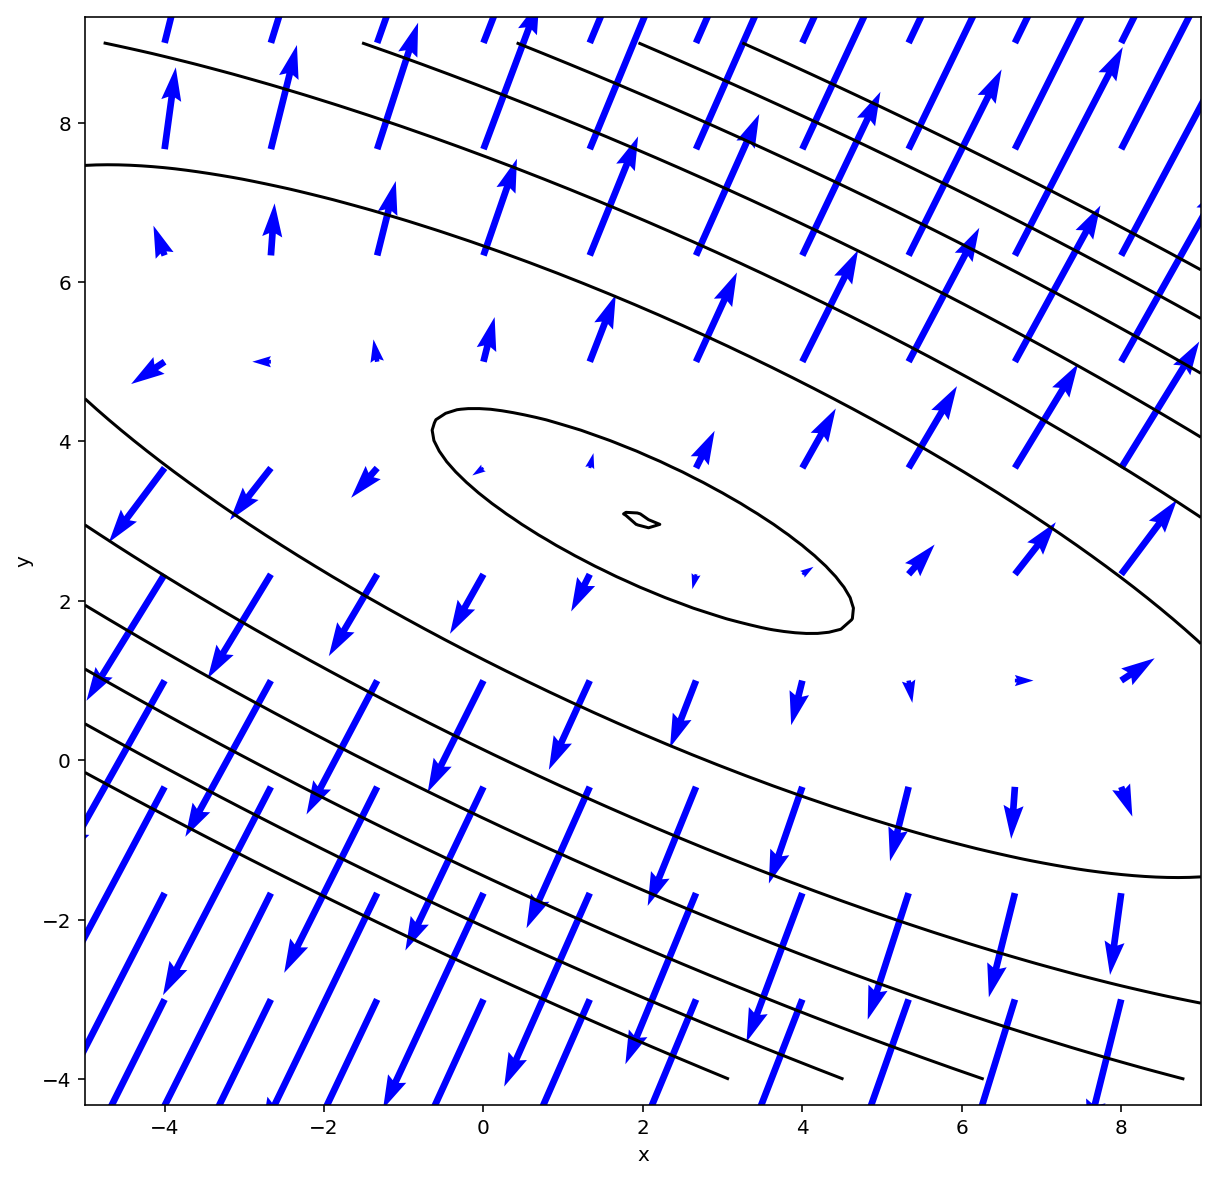

In [3]:
def f(x, y):
    return 2 * x**2 + 6 * x * y + 7 * y**2 - 26 * x - 54 * y + 107

xx = np.linspace(-5, 9, 100)
yy = np.linspace(-4, 9, 100)
X, Y = np.meshgrid(xx, yy)

Z = f(X, Y)
def gx(x, y):
    return 4 * x + 6 * y - 26

def gy(x, y):
    return 6 * x + 14 * y - 54

xx2 = np.linspace(-4, 8, 10)
yy2 = np.linspace(-3, 9, 10)
X2, Y2 = np.meshgrid(xx2, yy2)

GX = gx(X2, Y2)
GY = gy(X2, Y2)

plt.figure(figsize=(10,10))
plt.contour(X, Y, Z, levels=[0.05, 5, 50, 100, 150, 200, 250, 300], colors='k')
plt.quiver(X2, Y2, GX, GY, color='blue', scale=400)
plt.axis("equal")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 3. 행렬 미분 법칙

#### 3-1. 선형모형

선형모형을 미분하면 가중치 벡터가 됨

$$\frac{\partial \mathbf{w}^{T}\mathbf{x}}{\partial \mathbf{x}} = \frac{\partial \mathbf{x}^{T}\mathbf{w}}{\partial \mathbf{x}} = \mathbf{w}$$ 

(증명)

$$ 
\dfrac{\partial (\mathbf{w}^T \mathbf{x})}{\partial \mathbf{x}}=
\begin{bmatrix}
\dfrac{\partial (\mathbf{w}^T \mathbf{x})}{\partial x_1} \\
\dfrac{\partial (\mathbf{w}^T \mathbf{x})}{\partial x_2} \\
\vdots \\
\dfrac{\partial (\mathbf{w}^T \mathbf{x})}{\partial x_N} \\
\end{bmatrix} =
\begin{bmatrix}
\dfrac{\partial (w_1 x_1 + \cancel{w_2 x_2} + \cdots + \cancel{w_N x_N})}{\partial x_1} \\
\dfrac{\partial (\cancel{w_1 x_1} + w_2 x_2 + \cdots + \cancel{w_N x_N})}{\partial x_2} \\
\vdots \\
\dfrac{\partial (\cancel{w_1 x_1} + \cancel{w_2 x_2} + \cdots + w_N x_N)}{\partial x_N} \\
\end{bmatrix} =
\begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
w_N \\
\end{bmatrix}
= \mathbf{w} 
$$

#### 3-2. 이차 형식

이차형식을 미분하면 행렬과 벡터의 곱이 됨

$$\frac{\partial \mathbf{x}^{T}\mathbf{A}\mathbf{x}}{\partial \mathbf{x}} = (\mathbf{A} + \mathbf{A}^{T})\mathbf{x}$$

(증명)


$$ 
\begin{eqnarray}
\dfrac{\partial (\mathbf{x}^{T}\mathbf{A}\mathbf{x})}{\partial \mathbf{x}}
&=&
\begin{bmatrix}
\dfrac{\partial (\mathbf{x}^{T}\mathbf{A}\mathbf{x})}{\partial x_1} \\
\dfrac{\partial (\mathbf{x}^{T}\mathbf{A}\mathbf{x})}{\partial x_2} \\
\vdots \\
\dfrac{\partial (\mathbf{x}^{T}\mathbf{A}\mathbf{x})}{\partial x_N} \\
\end{bmatrix} \\
&=&
\begin{bmatrix}
\dfrac{\partial (\sum_{i=1}^{N} \sum_{j=1}^{N} a_{ij} x_i x_j)}{\partial x_1} \\
\dfrac{\partial (\sum_{i=1}^{N} \sum_{j=1}^{N} a_{ij} x_i x_j)}{\partial x_2} \\
\vdots \\
\dfrac{\partial (\sum_{i=1}^{N} \sum_{j=1}^{N} a_{ij} x_i x_j)}{\partial x_N} \\
\end{bmatrix} \\
&=&
\begin{bmatrix}
\dfrac{\partial 
\left(
\begin{matrix}
a_{11}x_1x_1 + a_{12}x_1x_2 + \cdots + a_{1N}x_1x_N + \\
a_{21}x_2x_1 + \cancel{a_{22}x_2x_2} + \cdots + \cancel{a_{2N}x_2x_N} + \\
\cdots  \\
a_{N1}x_Nx_1 + \cancel{a_{N2}x_Nx_2} + \cdots + \cancel{a_{NN}x_Nx_N} 
\end{matrix}
\right)}{\partial x_1} \\
\dfrac{\partial 
\left(
\begin{matrix}
\cancel{a_{11}x_1x_1} + a_{12}x_1x_2 + \cdots + \cancel{a_{1N}x_1x_N} + \\
a_{21}x_2x_1 + a_{22}x_2x_2 + \cdots + a_{2N}x_2x_N + \\
\cdots  \\
\cancel{a_{N1}x_Nx_1} + a_{N2}x_Nx_2 + \cdots + \cancel{a_{NN}x_Nx_N}
\end{matrix}
\right)}{\partial x_2} \\
\vdots \\
\end{bmatrix} 
\\
&=&
\begin{bmatrix}
\sum_{i=1}^{N} a_{1i} x_i + \sum_{i=1}^{N} a_{i1} x_i\\
\sum_{i=1}^{N} a_{2i} x_i + \sum_{i=1}^{N} a_{i2} x_i\\
\vdots \\
\sum_{i=1}^{N} a_{Ni} x_i + \sum_{i=1}^{N} a_{iN} x_i\\
\end{bmatrix} \\
&=&
\begin{bmatrix}
\sum_{i=1}^{N} a_{1i} x_i\\
\sum_{i=1}^{N} a_{2i} x_i\\
\vdots \\
\sum_{i=1}^{N} a_{Ni} x_i\\
\end{bmatrix}
+
\begin{bmatrix}
\sum_{i=1}^{N} a_{i1} x_i \\
\sum_{i=1}^{N} a_{i2} x_i \\
\vdots \\
\sum_{i=1}^{N} a_{iN} x_i \\
\end{bmatrix} \\
&=&
\mathbf{A} \mathbf{x}  + \mathbf{A}^T \mathbf{x} 
=
(\mathbf{A} + \mathbf{A}^T)\mathbf{x} 
\end{eqnarray}
$$

1차 다항식과 2차 다항식에 대한 스칼라 미분과 비슷 (공식 외우는데 도움)

| 스칼라 미분                        | 벡터/행렬 미분                           |
| ------------------------------------ | ------------------------------------------ 
| $$ax \;\; \rightarrow \;\; a$$       | $$w^Tx \;\; \rightarrow \;\; w$$           
| $$ax^2 \;\; \rightarrow \;\; 2ax$$   | $$x^TAx \;\; \rightarrow \;\; (A+A^T)x$$ |

#### 3-3. 행렬 곱의 대각성분

- A,B 두 정방행렬을 곱해서 만들어진 행렬 AB의 대각성분(trace)는 스칼라
- 이 스칼라를 B행렬에 미분하면 A의 전치행렬이 나옴

$$ \dfrac{\partial \text{tr} (\mathbf{A}\mathbf{B})}{\partial \mathbf{B}} = \mathbf{A}^T$$

(증명)

$$ \text{tr}(\mathbf{A}\mathbf{B}) = \sum_{j=1}^N \sum_{i=1}^N a_{ij} b_{ji} $$

$$ \dfrac{\partial \text{tr} (\mathbf{A}\mathbf{B})}{\partial b_{ji}} = a_{ij} $$ 

#### 3-4. 행렬식의 로그

- 행렬식(determinant)는 스칼라, 이 값의 로그 값도 스칼라
- 이 값을 원래 행렬로 미분하면 원래 행렬의 역행렬의 전치 행렬이 됨

$$ \dfrac{\partial \log \det \mathbf{A} }{\partial \mathbf{A}} = (\mathbf{A}^{-1})^T $$

(증명)

행렬식의 정의에서

$$ \dfrac{\partial}{\partial a_{i,j}} \det A = C_{i,j} $$

행렬식과 역행렬의 관계에서 

$$ \dfrac{\partial}{\partial A} \det A = C = (\det A) (A^{-1})^T  $$

로그 함수 공식에 대입하면 

$$ \dfrac{d}{dx} \log f(x) = \dfrac{f'(x)}{f(x)} = \dfrac{(\det A) (A^{-1})^T}{\det A} = (A^{-1})^T $$

### 4. 스칼라로 벡터를 미분

- 스칼라는 독립변수 x, 벡터는 종속변수 y
- 함수가 여러개라 보는 것과 마찬가지

$$ y_1 = f_1(x) $$

$$ y_2 = f_2(x) $$

$$ \vdots $$

$$ y_m = f_m(x) $$

$$ \downarrow $$

$$
\mathbf{y} =
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots\\
y_M \\
\end{bmatrix}
= \mathbf{f}(x)
$$

벡터를 스칼라로 미분하는 경우에는 결과를 행 벡터로 표시

$$\frac{\partial \mathbf{y}}{\partial x} = \left[
\frac{\partial y_1}{\partial x}
\frac{\partial y_2}{\partial x}
\cdots
\frac{\partial y_M}{\partial x}
\right]$$

### 5. 벡터를 벡터로 미분 (자코비안 행렬)

- 독립변수와 종속변수의 각각의 조합에 대해 모두 미분이 존재 (도함수는 행렬 형태)
- 이러한 행렬을 자코비안 행렬(Jacobian Martrix)이라 함
- 벡터를 스칼라로, 스칼라를 벡터로 미분하는 경우와 행/열의 방향이 다름

$$\mathbf J = \frac{d\mathbf y}{d\mathbf x} = 
\begin{bmatrix}
\dfrac{\partial y_1}{\partial \mathbf x}^T \\ \vdots \\ \dfrac{\partial y_M}{\partial \mathbf x}^T 
\end{bmatrix} =
\begin{bmatrix}
\nabla y_1^T \\ \nabla y_2^T \\ \vdots \\ \nabla y_M^T \\ 
\end{bmatrix} =
\begin{bmatrix}
\dfrac{\partial y_1}{\partial x_1} & \cdots & \dfrac{\partial y_1}{\partial x_N}\\
\vdots & \ddots & \vdots\\
\dfrac{\partial y_M}{\partial x_1} & \cdots & \dfrac{\partial y_M}{\partial x_N} 
\end{bmatrix}$$

### 6. 헤시안 행렬 (Hessian Matrix)

- 그레디언트 벡터를 독립변수 벡터로 미분한 것 (벡터로 2번 미분)
- 일반적으로 대칭행렬

$$
H = \begin{bmatrix}
  \dfrac{\partial^2 f}{\partial x_1^2} & \dfrac{\partial^2 f}{\partial x_2\,\partial x_1} & \cdots & \dfrac{\partial^2 f}{\partial x_N\,\partial x_1} \\
  \dfrac{\partial^2 f}{\partial x_1\,\partial x_2} & \dfrac{\partial^2 f}{\partial x_2^2} & \cdots & \dfrac{\partial^2 f}{\partial x_N\,\partial x_2} \\
  \vdots & \vdots & \ddots & \vdots \\
  \dfrac{\partial^2 f}{\partial x_1\,\partial x_N} & \dfrac{\partial^2 f}{\partial x_2\,\partial x_N} & \cdots & \dfrac{\partial^2 f}{\partial x_N^2}
\end{bmatrix}
$$

### 7. 행렬로 스칼라 미분

행렬은 독립변수 x, 스칼라는 종속변수 y

$$
\frac{\partial y}{\partial \mathbf{X}} =
\begin{bmatrix}
\frac{\partial y}{\partial x_{1,1}} & \frac{\partial y}{\partial x_{1,2}} & \cdots & \frac{\partial y}{\partial x_{1,N}}\\
\frac{\partial y}{\partial x_{2,1}} & \frac{\partial y}{\partial x_{2,2}} & \cdots & \frac{\partial y}{\partial x_{2,N}}\\
\vdots & \vdots & \ddots & \vdots\\
\frac{\partial y}{\partial x_{M,1}} & \frac{\partial y}{\partial x_{M,2}} & \cdots & \frac{\partial y}{\partial x_{M,N}}\\
\end{bmatrix}
$$

### 연습문제

#### `연습 문제 1` 다음 함수의 그레디언트 벡터를 구하라

1.
$ f(x, y, z) = x + y + z $

2.
$ f(x, y, z) = xyz $

연습문제 1-1

$$ \nabla f = 
\begin{bmatrix}
\dfrac{\partial f}{\partial x}\\
\dfrac{\partial f}{\partial y}\\
\dfrac{\partial f}{\partial z}\\
\end{bmatrix} = 
\begin{bmatrix}
1\\
1\\
1\\
\end{bmatrix} $$

연습문제 1-2

$$ \nabla f = 
\begin{bmatrix}
\dfrac{\partial f}{\partial x}\\
\dfrac{\partial f}{\partial y}\\
\dfrac{\partial f}{\partial z}\\
\end{bmatrix} = 
\begin{bmatrix}
yz\\
xz\\
xy\\
\end{bmatrix} $$

#### `연습 문제 2`

위 2차원 함수로 표현되는 지형을 상상하라. 이 지형의 어느 지점에 공을 두었다면 어떠한 경로로 공이 지나갈지 생각하여 퀴버 플롯에 경로를 그려라.

#### `연습 문제 3` 다음 함수의 자코비안 행렬을 구하라

$$ 
f(x) = 
\begin{bmatrix}
\sum_i^N x_i \\
\prod_i^N x_i 
\end{bmatrix}
$$

$$ f(x) = 
\begin{bmatrix}
{1} & {1} & {1}\\
{yz} & {xz} & {xy}\\
\end{bmatrix} $$



#### `연습 문제 4` 다음 함수의 헤시안 행렬을 구하라

$$ 
f(x) = \sum_i^N x_i^2
$$

$$
H = \begin{bmatrix}
  \dfrac{\partial^2 x_1^2}{\partial x_1^2} & \dfrac{\partial^2 x_1^2}{\partial x_2\,\partial x_1} & \cdots & \dfrac{\partial^2 x_1^2}{\partial x_N\,\partial x_1} \\
  \dfrac{\partial^2 x_2^2}{\partial x_1\,\partial x_2} & \dfrac{\partial^2 x_2^2}{\partial x_2^2} & \cdots & \dfrac{\partial^2 x_2^2}{\partial x_N\,\partial x_2} \\
  \vdots & \vdots & \ddots & \vdots \\
  \dfrac{\partial^2 x_n^2}{\partial x_1\,\partial x_N} & \dfrac{\partial^2 x_n^2}{\partial x_2\,\partial x_N} & \cdots & \dfrac{\partial^2 x_n^2}{\partial x_N^2}
\end{bmatrix} =
\begin{bmatrix}
{2} & {0} & \cdots & {0}\\
{0} & {2} & \cdots & {0}\\
\vdots & \vdots & \ddots & \vdots \\
{0} & {0} & \cdots & {2}\\
\end{bmatrix}
$$